<a href="https://colab.research.google.com/github/trprado/udacity/blob/master/datascience_ii/project_iii/Analyze_ab_test_results_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
# Load dataset
df = pd.read_csv('ab_data.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [0]:
print(df.shape[0])

294478


c. The number of unique users in the dataset.

In [0]:
print(df.user_id.nunique())

290584


d. The proportion of users converted.

In [0]:
df.converted.sum() / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [0]:
df.query('group == "treatment" and landing_page == "old_page"').count()[0] + df.query('group == "control" and landing_page == "new_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [0]:
print(df.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [6]:
temp1 = df.query('group == "treatment" and landing_page == "old_page"')
temp2 = df.query('group == "control" and landing_page == "new_page"')
temp = temp1.append(temp2)
df2 = df.drop(temp.index, axis=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null datetime64[ns]
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 13.3+ MB


In [0]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [0]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [0]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [0]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [0]:
df2.drop(df2[df2.user_id.duplicated()].index, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [0]:
df2.converted.sum() / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [0]:
df2.query('group == "control"').converted.sum() / df2.query('group == "control"').converted.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [0]:
df2.query('group == "treatment"').converted.sum() / df2.query('group == "treatment"').converted.count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [0]:
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Considerando que `1` seja uma conversão do tipo de página atual para o inverso, 12.04% do grupo `controle` se converteu para `new_page` se mantendo 87.96% dos usuários do grupo se manteve na `old_page`. Já o grupo `treatment` se manteve em `new_page` 88.12%, sendo que 11.88% se converteu para `old_page`.

Isso nos permite dizer que as taxas de conversão são muito próximas para se tomar uma decisão e dizer qual das páginas tem maior taxa de conversão.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_{0}: p_{new} - p_{old} \leq 0$$
$$H_{1}: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

A parte abaixo, antes das perguntas, são apenas a Análise A/B do teste de hipóteses acima, pergunta 1.

In [0]:
# Select control group and calculate proportion
control_df = df2.query('group == "control"')
control_converse_rate = control_df.query('converted == 1').count()[0] / control_df.shape[0]
control_converse_rate

0.1203863045004612

In [0]:
# Select treatment group and calculate proportion
treatment_df = df2.query('group == "treatment"')
treatment_converse_rate = treatment_df.query('converted == 1').count()[0] / treatment_df.shape[0]
treatment_converse_rate

0.11880806551510564

In [0]:
# Diffs observed
obs_diff = treatment_converse_rate - control_converse_rate
obs_diff

-0.0015782389853555567

In [0]:
%%time
# Generate 10000 samples
diffs = []
for _ in range(10000):
    bt = df2.sample(df2.shape[0], replace=True)
    control_df = bt.query('group == "control"')
    treatment_df = bt.query('group == "treatment"')
    control_rate = bt.query('converted == 1').count()[0] / control_df.shape[0]
    treatment_rate = bt.query('converted == 1').count()[0] / treatment_df.shape[0]
    diffs.append(treatment_rate - control_rate)

CPU times: user 29min 41s, sys: 13.3 s, total: 29min 55s
Wall time: 30min 2s


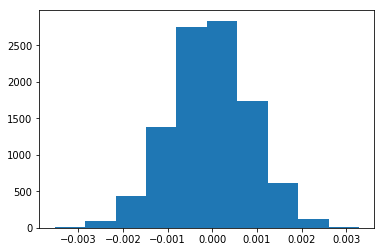

In [0]:
# Transform diffs list in numpy array
diffs = np.array(diffs)
plt.hist(diffs);

In [0]:
# Generate random values using a normal distribuition
null_vals = np.random.normal(0, diffs.std(), diffs.size);

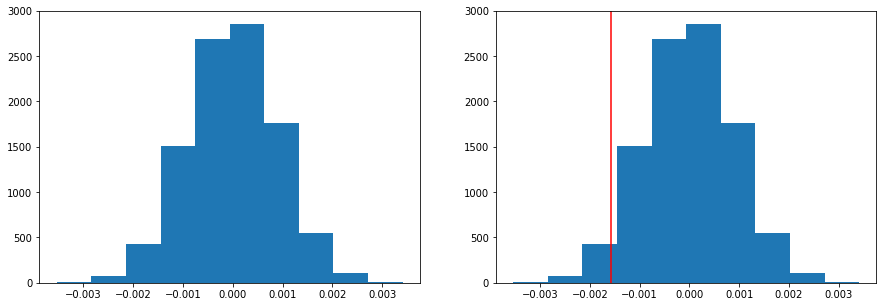

In [0]:
# Plot of two histograms of the random values that was generated above
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(null_vals)
plt.subplot(122)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [0]:
# P-value calculated
(null_vals > obs_diff).mean()

0.9614

a. What is the **convert rate** for $p_{new}$ under the null? 

In [0]:
p_new = df2.converted.sum() / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [0]:
p_old = df2.converted.sum() / df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [0]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [0]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [0]:
new_page_converted = df2.converted.sample(n_new)
new_page_converted[:10]

226955    0
281307    0
152954    0
59737     0
137354    0
135829    0
199333    0
224334    0
60532     0
40013     0
Name: converted, dtype: int64

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [0]:
old_page_converted = df2.converted.sample(n_old)
old_page_converted[:10]

157179    0
233781    0
60008     0
105875    0
91065     0
93034     0
243172    0
223445    0
271197    0
226901    0
Name: converted, dtype: int64

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [0]:
new_page_converted.mean() - old_page_converted.mean()

-1.5834757087551665e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [0]:
%%time
p_diffs = []

for _ in range(int(1e4)):
    new_page_converted = df2.converted.sample(n_new)
    old_page_converted = df2.converted.sample(n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

CPU times: user 6min 28s, sys: 551 ms, total: 6min 28s
Wall time: 6min 30s


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

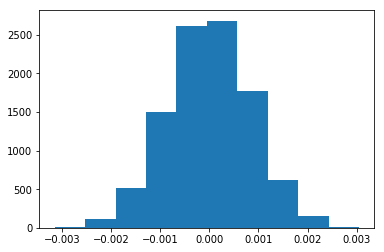

In [0]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [0]:
(p_diffs > obs_diff).mean()

0.9676

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Na parte `j` foi calculado o p-valor da estatística para verificar se a hipótese nula é verdadeira. Para tal, foi calculada a média de todos os valores `p_diffs` maiores que o valor observado `obs_diff`.

Este valor é chamado de p-valor.

Com um nível de significância de 5%, podemos concluir que a hipótese nula não é rejeitada, ou seja, não existe diferença estatística significativa de conversão de `old_page` e `new_page`.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [0]:
import statsmodels.api as sm

convert_old = p_old
convert_new = p_new
n_old = n_old
n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [0]:
sm.stats.proportions_ztest([p_old, p_new], [n_old, n_new])

(6.059074386432219e-05, 0.9999516555809727)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

O z-score é a estatística calculada do teste, enquanto o p-valor é a probabilidade de observar sua estatística (ou uma mais extrema em favor da alternativa) se a hipótese nula for verdadeira.

Os valores encontrados estão de acordo com os encontrados na parte `j` e `k`, porém na parte `j` a hipótese pedida foi de `p_diffs` maiores que `obs_diff`.

Em ambos os testes a conclusão é a mesma, ou seja, ao nível de significância de 5% pode-se concluir que não se rejeita a hipótese nula, em outras palavras, pode-se dizer que não existe diferença significativa de conversão entre `old_page` e `new_page`.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Como a variável resposta é categoria (converte ou não converte), a melhor forma é utilizar regressão logística nesse caso.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [8]:
df2[['ab_page']] = pd.get_dummies(df2['group']).drop(columns='control')
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [0]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [0]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        23:42:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

O p-valor é 0.190, nesse caso o p-valor nos diz se o coeficiente de regressão é significativo para o modelo ou não. Nesse caso o p-valor não é significativo então não rejeitamos a hipótese nula ao nível de significância de 5%.

Em outras palavras, na parte II foi feito um teste de hipótese unilateral à direita, $H_{0}$ sugere se a diferença das proporções  (`p_new` e `p_old`)  era menor ou igual a zero, e a $H_{1}$ sugere que 'p_new' seja melhor que 'p_old'. O cálculo do p-valor para o teste de hipótese unilateral à direita é baseado na média das diferenças amostradas que são superiores a diferença observada dos dados, ou seja, o p-valor unilateral à direita é  P(estatística do teste $\geq$ valor observado calculado do teste baseado na amostra dado que $H_{0}$ é verdadeiro) = 1 - (função de distribuição acumulada da estatística do teste sob a hipótese nula), onde P é a probabilidade. Caso o p-valor encontrado seja inferior ao nível de significância escolhido (no caso 5%) rejeita-se a hipótese nula e conclui-se que a p_new possui resultados melhores que p_old, referente a conversão; caso contrário, ou seja, se o p-valor calculado for maior que o nível de significância escolhido, pode -se concluir que não se rejeita a hipótese nula e que não há diferença estatística entre as duas páginas.

Para o teste de hipóteses baseado no modelo de regressão logística, na parte III, foi feito um teste de hipóteses bilateral pois ele avalia o coeficiente de regressão, ou seja, $H_{0}$  sugere que o coeficiente de regressão testado é igual a zero e em  $H_{1}$ sugere que o coeficiente é diferente de zero. Em outras palavras, o teste de hipótese dos coeficientes de regressão avaliam se o coeficiente é significativo ($H_{1}$) ou não ($H_{0}$) para o modelo, caso ele seja significativo, a variável explicativa associada a ele explica, parcialmente, a variável resposta e, portanto, ele é incluso na equação de regressão. O cálculo do p-valor para o teste de hipótese bilateral é calculado da seguinte maneira: $2 * $P(estatística do teste  $\geq$ o módulo do valor observado calculado do teste baseado na amostra dado que $H_{0}$ é verdadeiro) = $2 *$ (1 - função de distribuição acumulada do módulo da estatística do teste sob a hipótese nula), onde P é a probabilidade.

Tanto o teste de hipótese quanto o modelo logístico estão testando a mesma coisa, se a `new_page` contribuiu significativamente para a conversão. Em ambos foi possível verificar que não houve diferença estatística significativa, indicando que a `new_page` não aumentou o número de conversões, como era esperado.

Fonte: https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/manually-calculate-a-p-value/

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Outras variáveis podem influenciar, como o tempo de execução do teste (curto demais ou muito longo) enviesando os resultados da análise. Também caso usuários que já estão acostumados com o design antigo mostrarem resistência em trocar para um design novo, ou ainda o design novo trazer o efeito momentâneo de algo novo, mesmo que não ideal. Também a existencia de mais variáveis não significa um modelo melhor, tornando as amostras esparças e pouco similares (`countries`), causando problemas de dimensionalidade, ou mesmo variáveis de confusão (`landing_page`) que causam problemas de identificação dos efeitos.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [9]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [10]:
### Create the necessary dummy variables
df_new = df_new.join(pd.get_dummies(df_new.country))
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [0]:
### Fit Your Linear Model And Obtain the Results
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']

lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'ab_CA', 'ab_UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 10 Jan 2019   Pseudo R-squ.:               3.482e-05
Time:                        23:42:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

Ao nível de 5% de significância, pode-se concluir que para as variáveis `ab_page`, `CA` e `UK` e suas interações, `ab_CA` e `ab_UK`, não se rejeita a hipótese nula, ou seja, elas não são significativas para o modelo. Para o intercepto, ao nível de significância de 5%, conclui-se que se rejeita a hipótese nula, ou seja, esse coeficiente é significativo para o modelo.

Na prática, podemos dizer que não vale a pena alterar a antiga página para a nova, devido ao fato que não houve aumento na conversão. Porém, deve ser considerado se o tempo total foi suficiente ou não para que os dados capturassem corretamente a conversão entre as páginas, analisando a variável de tempo (como visto abaixo), observou-se que o experimento foi executado em 22 dias, o que é um tempo curto para que os vieses que são característico desse tipo de teste possam ser eliminados. Sugere que para verificar a significância do teste seja refeito o experimento por um tempo maior.

In [46]:
# Tempo de execução do experimento
pd.to_datetime(df_new.timestamp.sort_values().iloc[-1]).to_period('D') - pd.to_datetime(df_new.timestamp.sort_values().iloc[0]).to_period('D')

22

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.